***Loading Images from my Google Drive***

* 2.1 Importing Libraries

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2

* 2.2 Loading Image to test




In [ ]:
!wget -q --show-progress --no-check-certificate '' -O Capture.JPG # ID is from Google Drive Shared Link. Upload your image on google drive, and share the ID of the link. Or upload your own image.

Capture.JPG         100%[===================>]  56.22K  --.-KB/s    in 0.001s  


In [ ]:
!wget -q --show-progress --no-check-certificate '' -O Capture_2.JPG # ID is from Google Drive Shared Link. Upload your image on google drive, and share the ID of the link. Or upload your own image.

Capture_2.JPG       100%[===================>]  37.16K  --.-KB/s    in 0s      


* 2.3 Code for Displaying Images




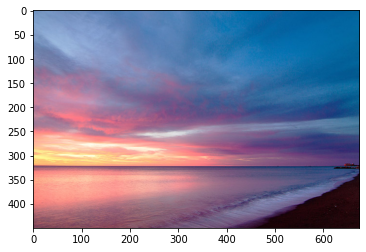

In [ ]:
image = cv2.imread('Capture.JPG') # Reading Image File

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # This image will be in BGR fromate, we will convert this into RG

plt.imshow(image) # Display Image File

plt.show()

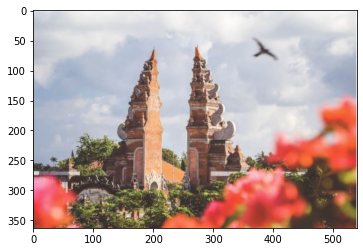

In [ ]:
image_2 = cv2.imread('Capture_2.JPG') # Reading Image File

image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB) # This image will be in BGR fromate, we will convert this into RG

plt.imshow(image_2) # Display Image File

plt.show()

***Solution to the Problem - Generating Color Distribution***

Essentially what we are trying to do is to Generate Clusters of colors that are most seen in the images. We are creating List of Pixels, and then applying K-Means Clustering to generate these clusters. Then a histogram is created which represents the dominant colors, with the percentage of these colors visible from the overall image.

* 2.4 Loading images 




In [ ]:
def load_image(image_name):  # Load the given image

    image = cv2.imread(image_name)  
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # This image will be in BGR format, we will convert this into RGB 
    
    plt.figure()
    plt.axis("off")
    plt.title("Given Image")
    plt.imshow(image) # Display the image using matplotlib
    
    return image

* 2.5 Generating List of Pixels 




In [ ]:
def image_list_pixelation(image): # We Will Generate K-Means Clusters from n number of data points, so our image of MxN shape are our Data Points
    
    image = image.reshape((image.shape[0]*image.shape[1], 3)) # We need to re-shape our image to be a list of pixels, instead of MxN Matrix of Pixels
    
    return image # Return the Image

* 2.6 Applying K-Means Clustering




In [ ]:
def k_means_clustering(image, cluster): # Apply K-Means from sklearn library

    clt = KMeans(n_clusters = cluster)
    clt.fit(image)

    return clt # Return the Clusters

* 2.7 Generating Histogram




In [ ]:
def centroid_histogram(clt): # Grab the Number of Different Clusters and Create a Histogram, based on the Number of Pixels assigned to each Cluster

    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    hist,_ = np.histogram(clt.labels_, bins = numLabels) # Normalize the Histogram
    hist = hist.astype("float")
    hist/=hist.sum()

    return hist # Return the Histogram

* 2.8 Generating Bar Chart 




In [ ]:
Percent = [] # List used to Store Percentages of Colors

def plot_colors(hist, centroids): 
    Percent.clear()
    bar = np.zeros((50, 300, 3), dtype = "uint8") # Initialize the Chart representing the Relative Frequency of Each Color
    startX = 0 

    for (percent, color) in zip(hist, centroids): # Loop over the Percentage of each Cluster and the color of each Cluster      
        endX = startX + (percent * 300) # Plot the relative percentage of each Cluster
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50), color.astype("uint8").tolist(), -1)
        startX = endX
        Percent.append(round(percent*100,2))

    return bar # Return the Bar Chart

* 2.9 Generating Color Clusters




In [ ]:
def apply_color_clustering(image_name, cluster):

    image = load_image(image_name) # Load the given Image   
    image = image_list_pixelation(image) # Convert Image Matrix to list of Pixels
  
    clt = k_means_clustering(image, cluster)   # Apply K-Means Clustering    
    hist = centroid_histogram(clt) # Build a histogram of clusters, then a figure representing the number of pixels labeled to each Color
    bar = plot_colors(hist, clt.cluster_centers_)

    plt.figure()
    plt.axis("off")
    plt.title("Cluster of Colors")
    plt.imshow(bar)
    plt.show()  # Display Cluster of Colors

* 2.10 Applying Solution to the pre-loaded images 




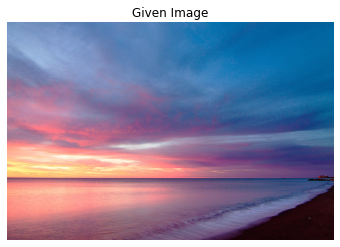

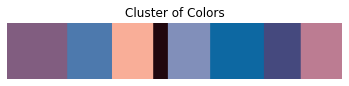

Percentage Distribution of Color in Image:  [18.15, 13.24, 12.59, 4.28, 12.67, 15.81, 11.11, 12.15]


In [ ]:
image_name = "Capture.JPG" # Choose pre-loaded image 1

cluster = 8 # Provide number of color clusters we want to display

apply_color_clustering(image_name, cluster) # Apply Clustering for Color Distribution

print("Percentage Distribution of Color in Image: ", Percent)

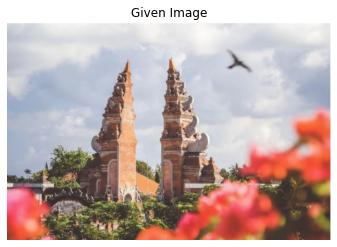

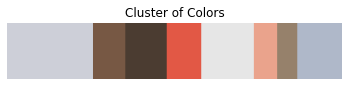

Percentage Distribution of Color in Image:  [25.87, 9.76, 12.16, 10.36, 15.82, 6.86, 6.1, 13.07]


In [ ]:
image_name = "Capture_2.JPG" # Choose pre-loaded image 2

cluster = 8 # Provide number of color clusters we want to display

apply_color_clustering(image_name, cluster) # Apply Clustering for Color Distribution

print("Percentage Distribution of Color in Image: ", Percent)

---
References


*   https://github.com/manishbendale/KMean-Clustring-Image-Colors-Distribution
*   https://towardsdatascience.com/image-color-extraction-with-python-in-4-steps-8d9370d9216e
* https://realpython.com/python-opencv-color-spaces/
